In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.status()

  Activating project at `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/Biquadratic.jl/analysis`


Status `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/Biquadratic.jl/analysis/Project.toml`
  [13f3f980] CairoMakie v0.15.3
  [780c37f4] Carlo v0.2.4
  [a93c6f00] DataFrames v1.7.0
  [f67ccb44] HDF5 v0.17.2


In [2]:
using CairoMakie
using Carlo.ResultTools
using DataFrames
using HDF5

In [11]:
# Parse DataFrame from ResultTools into more readily useable form
cleandata(filepath::AbstractString) = select(
    DataFrame(ResultTools.dataframe(filepath)),
    [:J1, :K, :Lx, :Ly, :Mag, :Energy, :Dx0, :Dy0],
)

cleandata (generic function with 1 method)

In [4]:
function generatePlot(data::AbstractDataFrame, x, y; fig=Figure(), fig_pos=(1,1),
                      title, xlabel, ylabel)
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    vals = getfield.(data[:, y], :val)
    errs = getfield.(data[:, y], :err)
    scatter!(data[:, x], vals)
    errorbars!(data[:, x], vals, errs)

    return fig
end

function generatePlot(data::GroupedDataFrame, x, y; fig=Figure(), fig_pos=(1,1),
                      title, xlabel, ylabel)
    fig = Figure()
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    for key in keys(data)
        group = data[key]
        vals = getfield.(group[:, y], :val)
        errs = getfield.(group[:, y], :err)
        scatter!(group[:, x], vals, label="$(NamedTuple(key))")
        errorbars!(group[:, x], vals, errs)
    end

    axislegend()

    return fig
end

generatePlot (generic function with 2 methods)

In [12]:
jobname = "j1-sweep"
data = groupby(cleandata("../jobs/" * jobname * ".results.json"), [:K])

Row,J1,K,Lx,Ly,Mag,Energy,Dx0,Dy0
,Float64,Float64,Int64,Int64,Measurem…,Measurem…,Measurem…,Measurem…
1,-2.0,0.2,40,40,0.2602±0.0017,-3.7421±0.0019,0.8907±0.0011,0.9016±0.0012
2,-1.9,0.2,40,40,0.14615±0.00043,-3.5493±0.0014,0.88156±0.00028,0.90149±0.00048
3,-1.8,0.2,40,40,0.102±0.0029,-3.3681±0.0018,0.81438±0.00031,0.82992±0.00035
4,-1.7,0.2,40,40,0.087±0.0013,-3.2174±0.0027,0.819±0.0011,0.83283±0.00042
5,-1.6,0.2,40,40,0.0804±0.0011,-3.0502±0.0028,0.7333±0.0018,0.7943±0.0014
6,-1.5,0.2,40,40,0.0487±0.0025,-2.8985±0.0018,0.704±0.00059,0.75207±0.00097
7,-1.4,0.2,40,40,0.0286±0.0038,-2.7893±0.0038,0.6251±0.0027,0.6735±0.002
8,-1.3,0.2,40,40,0.03049±0.00075,-2.6727±0.0013,0.57553±0.00047,0.61354±0.0002
9,-1.2,0.2,40,40,0.0259±0.0013,-2.564±0.0022,0.52866±0.00066,0.57841±0.00072


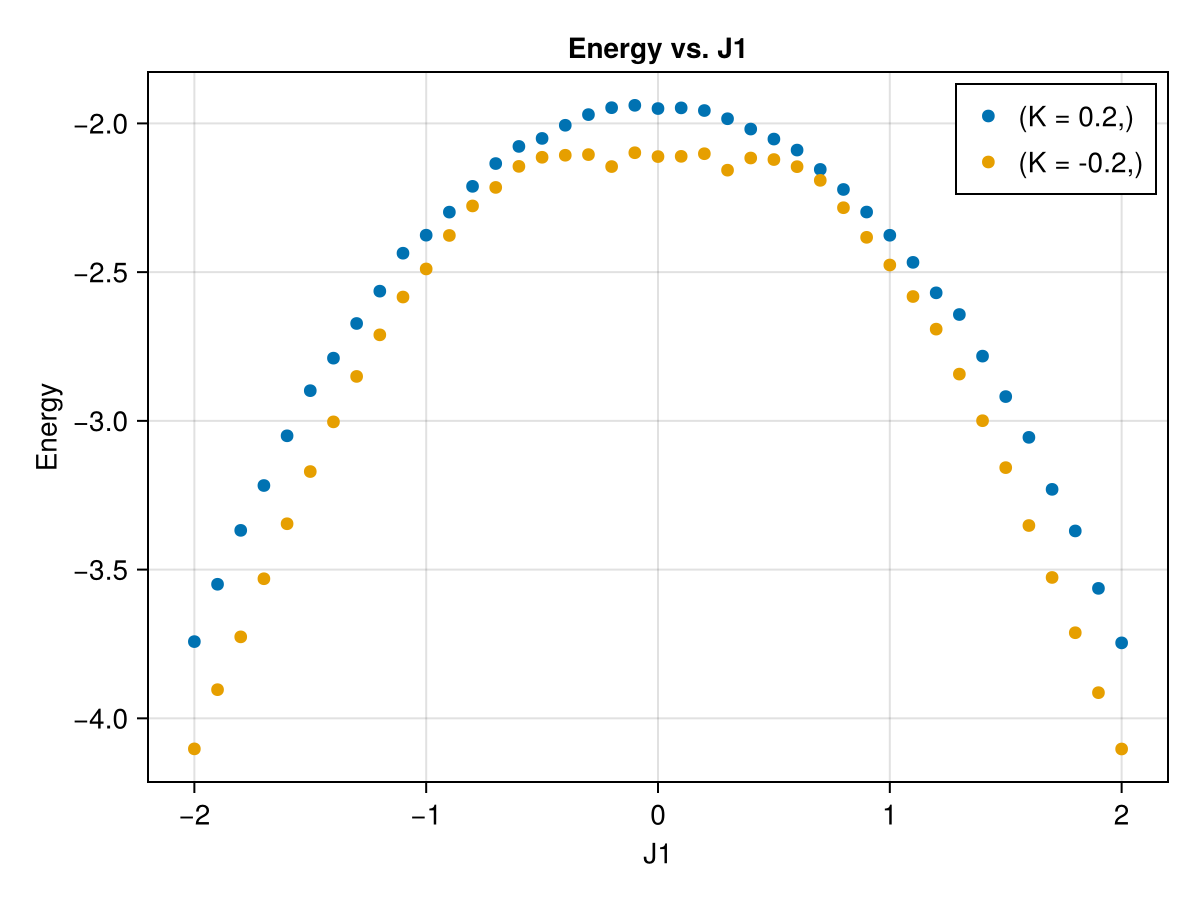

In [13]:
generatePlot(
    data, :J1, :Energy;
    title="Energy vs. J1",
    xlabel="J1",
    ylabel="Energy"
)

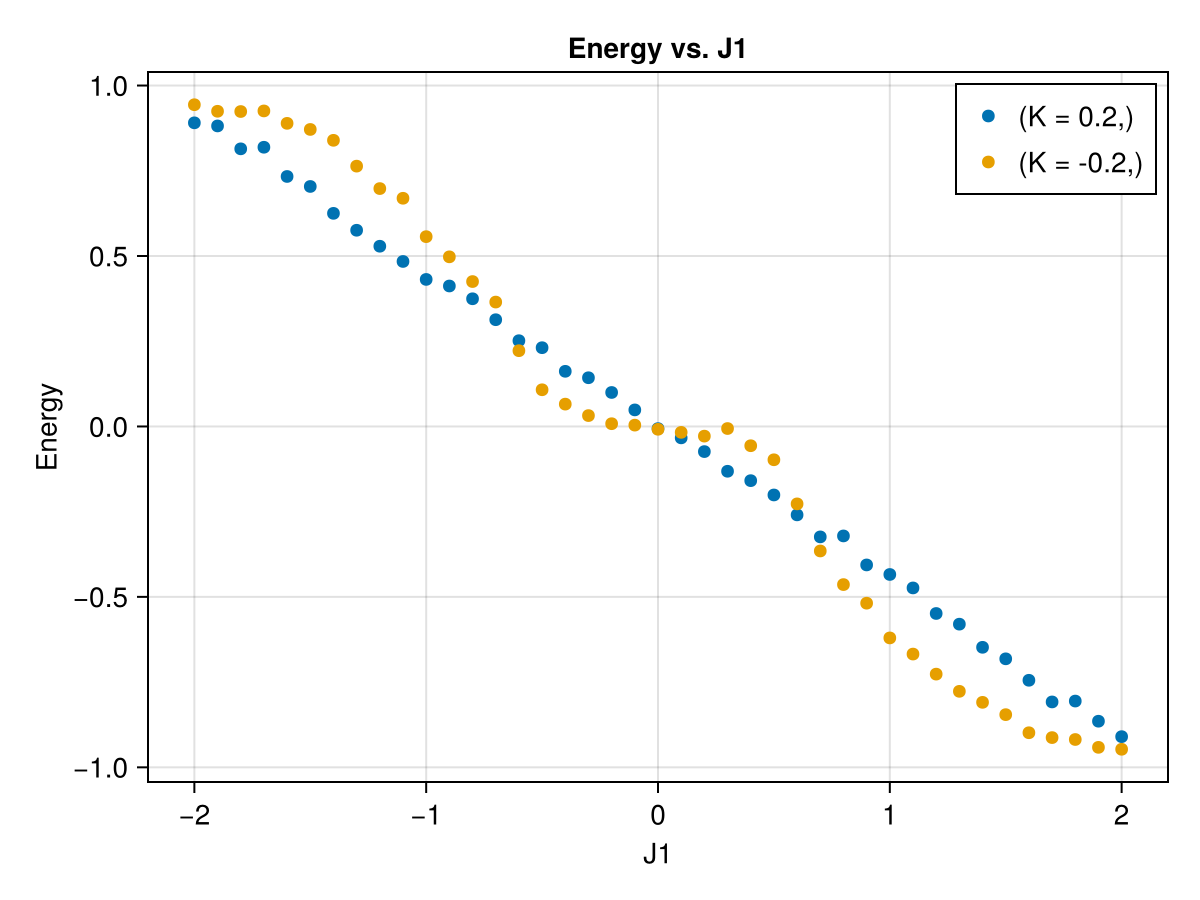

In [14]:
generatePlot(
    data, :J1, :Dx0;
    title="Energy vs. J1",
    xlabel="J1",
    ylabel="Energy"
)

In [15]:
jobname = "j1-fine-sweep"
fine_data = groupby(cleandata("../jobs/" * jobname * ".results.json"), [:K])

Row,J1,K,Lx,Ly,Mag,Energy,Dx0,Dy0
,Float64,Float64,Int64,Int64,Measurem…,Measurem…,Measurem…,Measurem…
1,-1.0,0.2,40,40,0.00898±0.00062,-2.37912±0.00081,0.45208±0.00031,0.4988±0.0013
2,-0.95,0.2,40,40,0.00952±0.00046,-2.333±0.0014,0.40238±0.00032,0.45567±0.00025
3,-0.9,0.2,40,40,0.00686±0.00069,-2.2669±0.0035,0.39366±0.00034,0.40906±0.0008
4,-0.85,0.2,40,40,0.00779±0.00048,-2.2363±0.0029,0.38321±0.00073,0.4019±0.0012
5,-0.8,0.2,40,40,0.00425±0.00048,-2.2068±0.0019,0.3639±0.0016,0.40054±0.00029
6,-0.75,0.2,40,40,0.00698±0.00072,-2.1691±0.0023,0.3303±0.0014,0.35908±0.00069
7,-0.7,0.2,40,40,0.00339±0.00017,-2.1476±0.0024,0.2981±0.0015,0.3506±0.0023
8,-0.65,0.2,40,40,0.00523±0.0003,-2.1093±0.0021,0.2917±0.0012,0.2736±0.0011
9,-0.6,0.2,40,40,0.00422±0.00034,-2.1154±0.0015,0.2396±0.0011,0.32144±0.00078


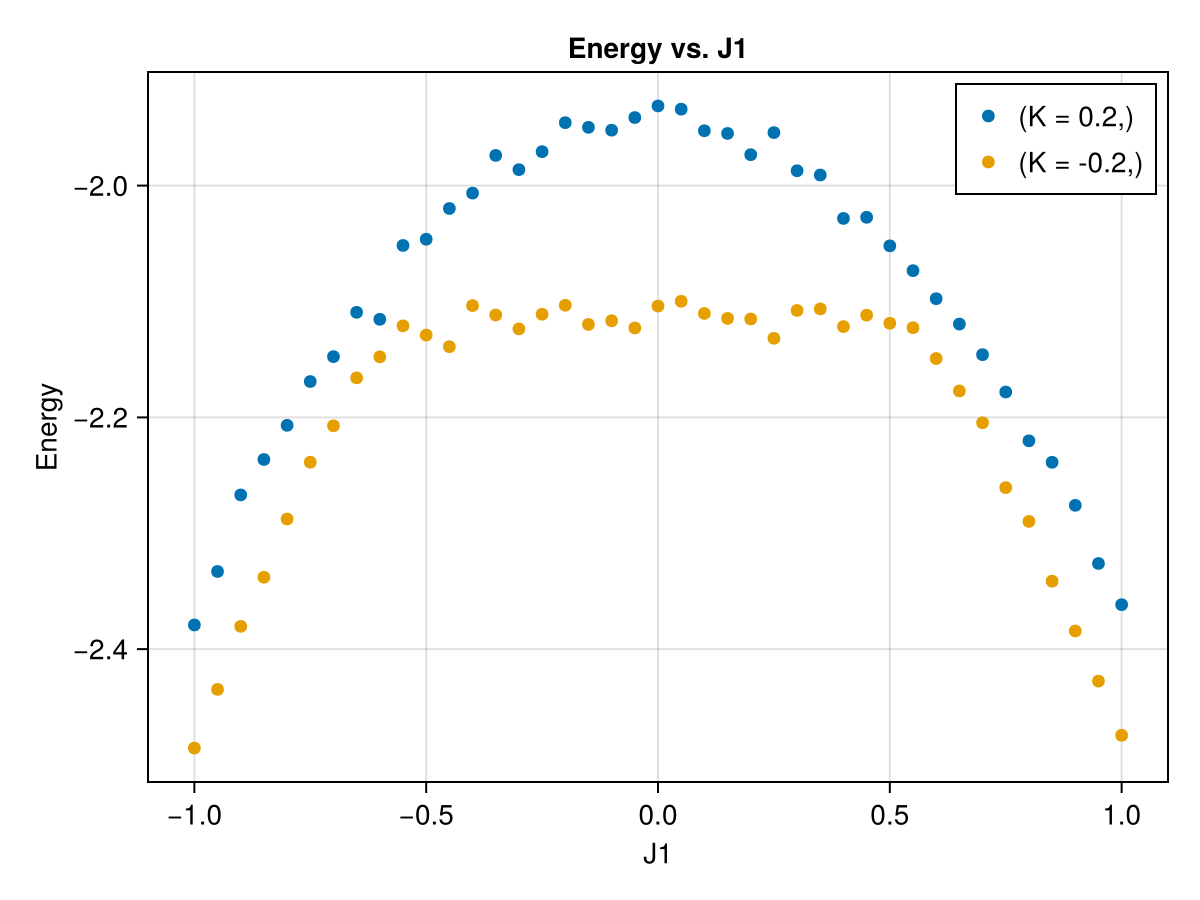

In [16]:
generatePlot(
    fine_data, :J1, :Energy;
    title="Energy vs. J1",
    xlabel="J1",
    ylabel="Energy"
)

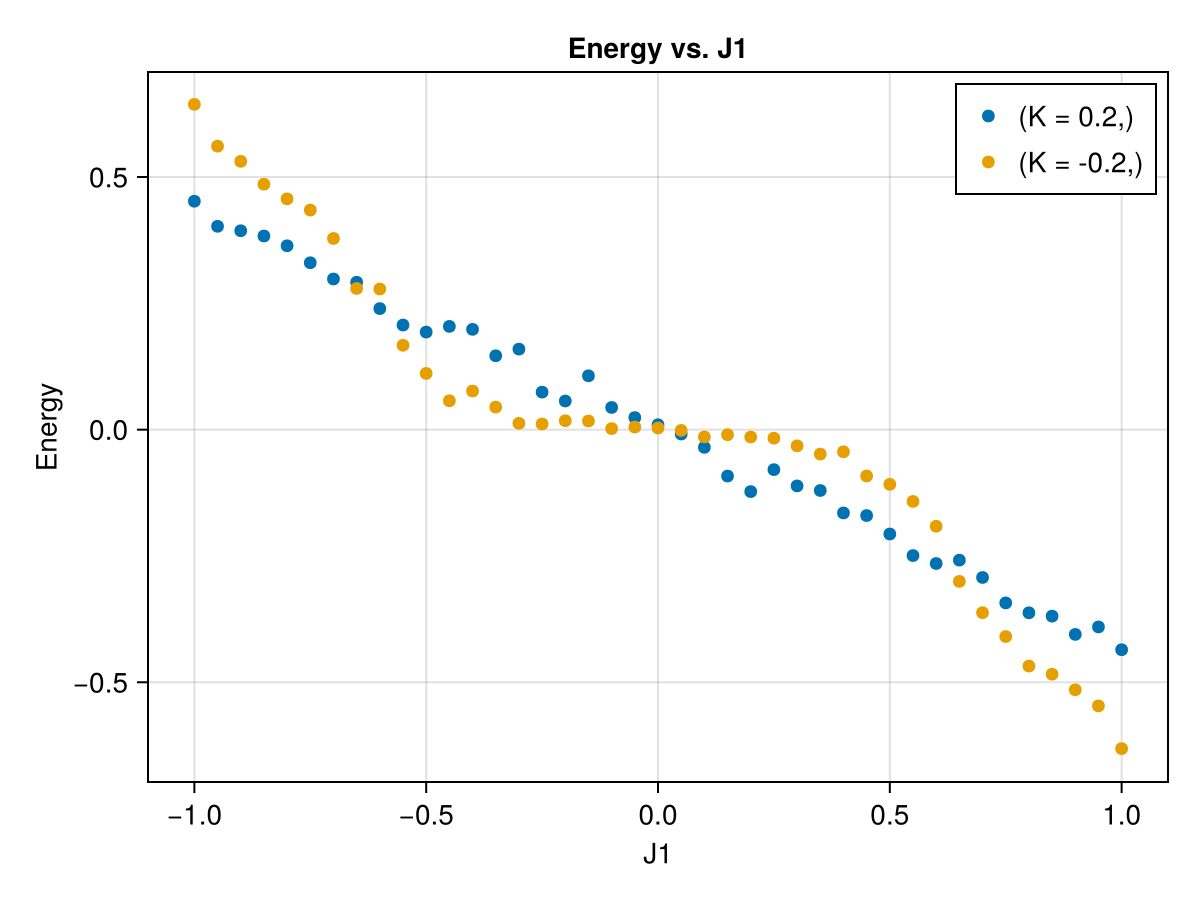

In [17]:
generatePlot(
    fine_data, :J1, :Dx0;
    title="Energy vs. J1",
    xlabel="J1",
    ylabel="Energy"
)

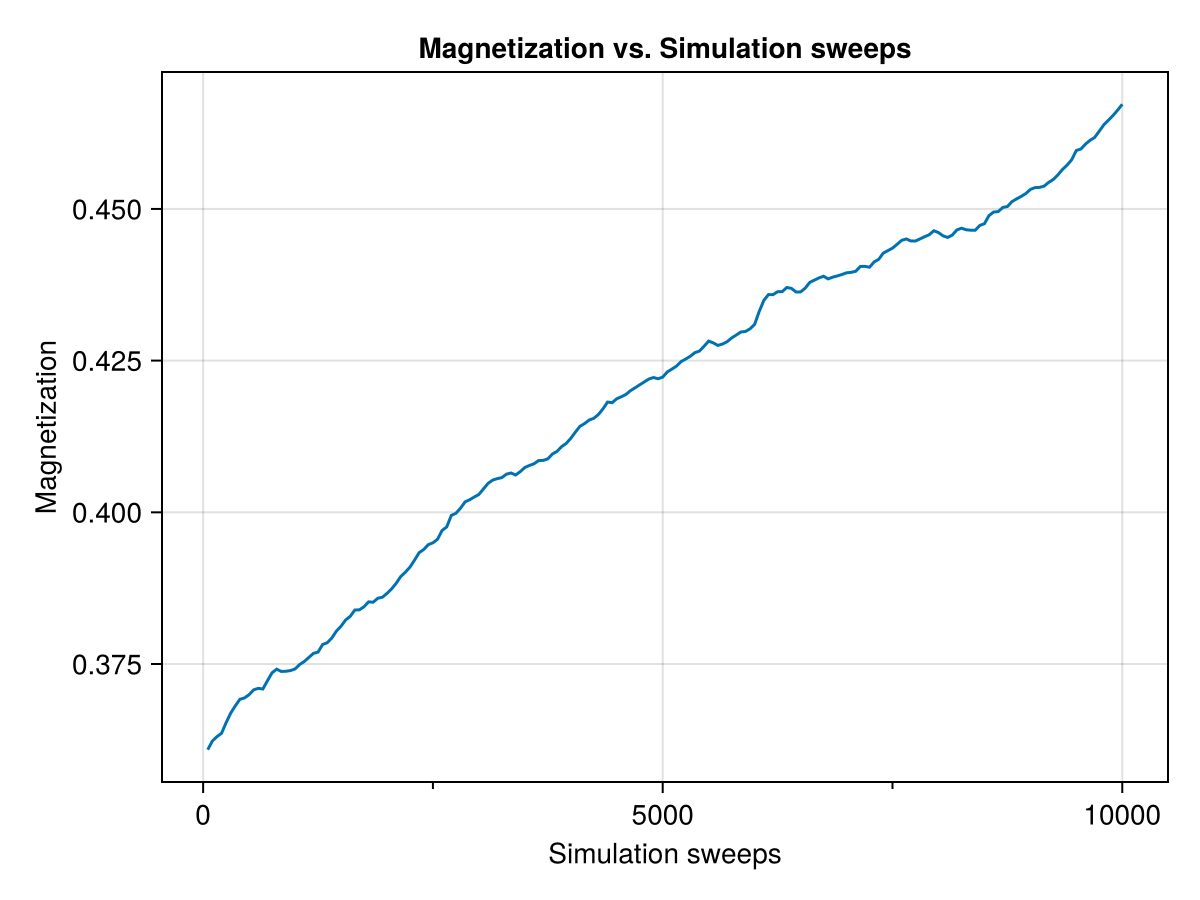

In [ ]:
fig = Figure()

ax = fig[1,1] = Axis(
    fig,
    title="Magnetization vs. Simulation sweeps",
    xlabel="Simulation sweeps",
    ylabel="Magnetization",
    xminorticksvisible=true
)

task_no = "02"
h5open("../jobs/j1-sweep.data/task00" * task_no * "/run0001.meas.h5") do file
    mag_group = file["observables/Energy"]
    mag_samples = read(mag_group, "samples")
    bin_len = read(mag_group, "bin_length")
    lines!(
        bin_len .* collect(1:length(mag_samples)),
        mag_samples,
        label="T = 2.2435698905536414"
    )
end

fig